<a href="https://colab.research.google.com/github/Christian-Bryan/Probabilidad-y-Estadistica/blob/main/Unidad6/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probabilidad y Estadística**

##Grupo: 2Y
## **Unidad 6**
Fecha: jueves, 25 de noviembre de 2025.

Integrantes del equipo: Dominguez Lopez Christian Bryan.

Docente: Jose Gabriel Rodriguez Rivas.




**Contenido del analisis**

Estadistica descriptiva

In [33]:
import pandas as pd
#Cargando el archivo como DataFrame
df=pd.read_csv("covid2020-2021-codificado.csv")
df.head()


/tmp/ipython-input-1889940205.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("covid2020-2021-codificado.csv")


,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,...,DIABETES,EPOC,ASMA,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_ANTIGENO,UCI
0,Issste,Femenino,San Luis Potosí,Ambulatorio,2020-12-06,9999-99-99,No aplica,No,55,No,...,Si,No,No,No,No,No,No,No,Pendiente,No aplica
1,Issste,Masculino,San Luis Potosí,Ambulatorio,2020-02-20,9999-99-99,No aplica,No,59,No aplica,...,No,No,No,No,No,No,No,No,Pendiente,No aplica
2,Ssa,Femenino,Jalisco,Ambulatorio,2020-04-22,9999-99-99,No aplica,No,42,No,...,No,No,Si,No,No,No,No,No,Pendiente,No aplica
3,Ssa,Masculino,Chihuahua,Ambulatorio,2020-07-28,9999-99-99,No aplica,No,35,No aplica,...,No,No,No,No,No,No,No,No,Pendiente,No aplica
4,Ssa,Masculino,Ciudad De México,Ambulatorio,2020-08-18,9999-99-99,No aplica,No,51,No aplica,...,No,No,No,Si,No,No,No,No,Pendiente,No aplica


In [34]:
resultados=df.RESULTADO_ANTIGENO.tolist()
#Numero de casos positivos
print(resultados.count("Positivo"),"casos positivos.")
#Numero de casos positivos
print(resultados.count("Negativo"),"casos negativos.")
#Numero de casos positivos
print(resultados.count("Pendiente"),"pendientes de resultado.")

1774708 casos positivos.
5853547 casos negativos.
5005939 pendientes de resultado.


In [35]:
tipo_paciente=df.TIPO_PACIENTE.tolist()
#Numero de pacientes hospitalizados
print(tipo_paciente.count("Hospitalizado"),"pacientes hospitalizados.")
#Numero de pacientes ambulatorios
print(tipo_paciente.count("Ambulatorio"),"pacientes ambulatorios.")

1090891 pacientes hospitalizados.
11543303 pacientes ambulatorios.


In [36]:
#Numero de pacientes embarazadas
print(df.EMBARAZO.tolist().count("Si"),"pacientes embarazadas.")

122583 pacientes embarazadas.


In [37]:
#Numero de pacientes indigenas
print(df.INDIGENA.tolist().count("Si"),"pacientes indigenas.")

35240 pacientes indigenas.


Visualizaciones

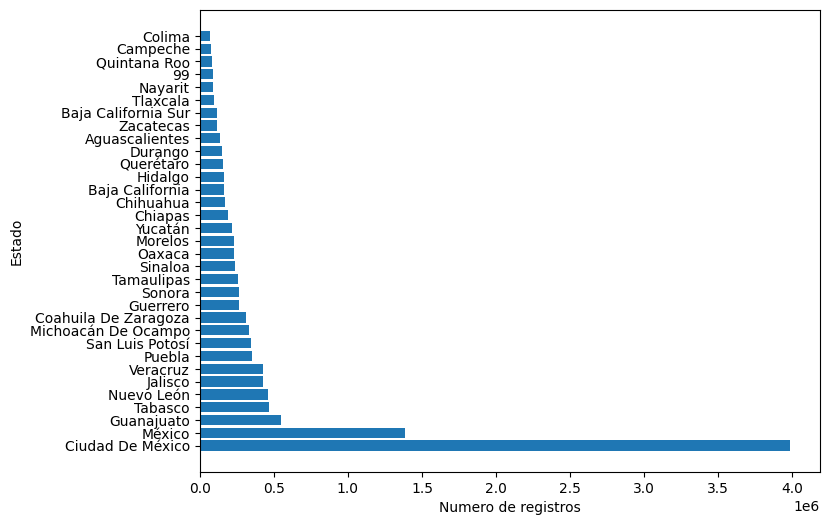

In [38]:
import matplotlib.pyplot as plt
#Contar registros por estado
conteo=df["ENTIDAD_NAC"].value_counts() #Regresa una Serie con indice=estado y valor=conteo
plt.figure(figsize=(8,6))
plt.xlabel("Numero de registros")
plt.ylabel("Estado")
plt.barh(conteo.index, conteo.values)
plt.show()


Text(0, 0.5, 'Numero de registros')

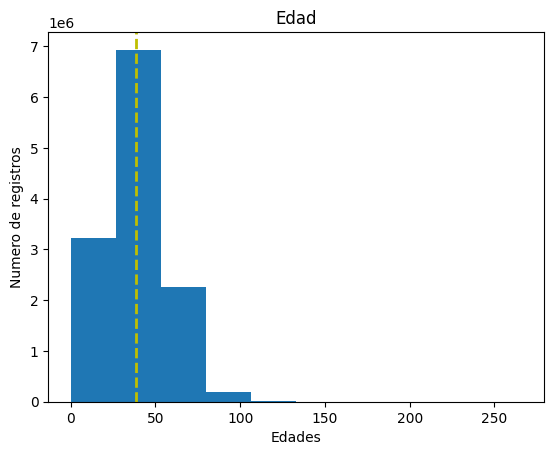

In [39]:
from matplotlib import pyplot
#Histograma por edad
media1=df["EDAD"].mean()
plt.hist(df["EDAD"])
plt.title("Edad")
plt.axvline(media1, color='y', linestyle='dashed', linewidth=2, label=f'Media={media1:.2f}')
plt.xlabel("Edades")
plt.ylabel("Numero de registros")



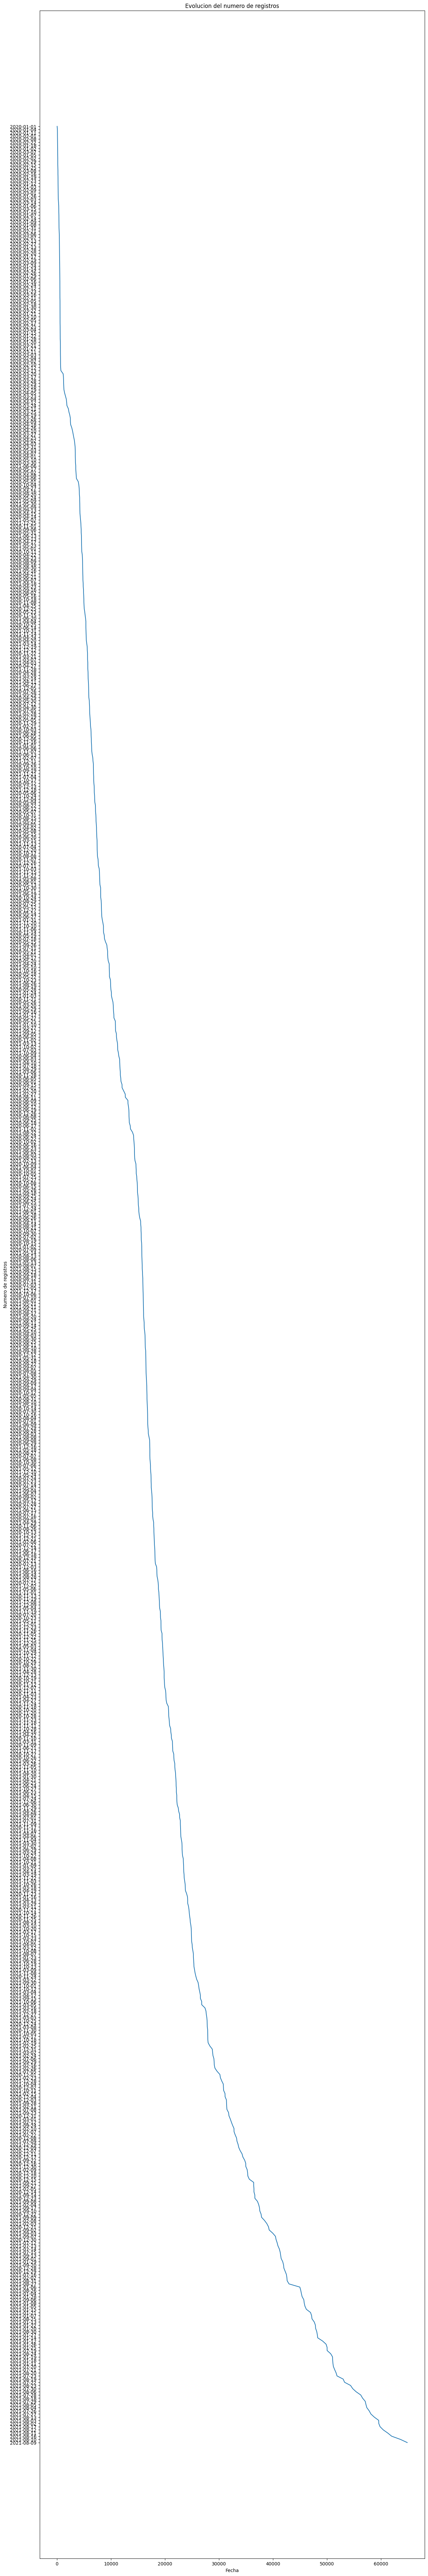

In [44]:
#Contar registros por estado
conteo=df["FECHA_INGRESO"].value_counts() #Regresa una Serie con indice=estado y valor=conteo
plt.figure(figsize=(15,100))
plt.title("Evolucion del numero de registros")
plt.xlabel("Fecha")
plt.ylabel("Numero de registros")
plt.plot(conteo.values, conteo.index)
plt.show()

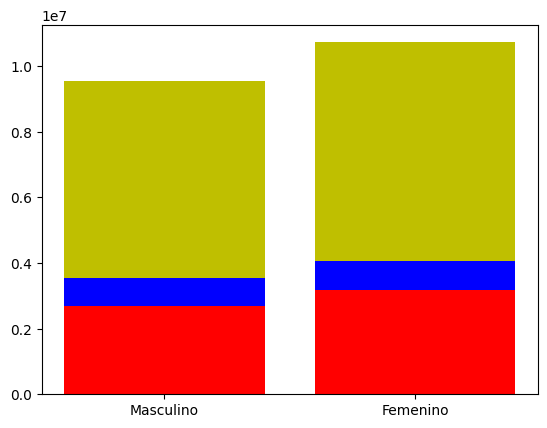

In [53]:
import numpy as np
#Grafico de barras apiladas por sexo y resultado
sexo=["Masculino", "Femenino"]
num_registros=np.array([(df["SEXO"].tolist().count("Masculino")),(df["SEXO"].tolist().count("Femenino"))])
num_positivos=np.array([((df["SEXO"]=="Masculino")&(df["RESULTADO_ANTIGENO"]=="Positivo")).sum(), ((df["SEXO"]=="Femenino")&(df["RESULTADO_ANTIGENO"]=="Positivo")).sum()])
num_negativos=np.array([((df["SEXO"]=="Masculino")&(df["RESULTADO_ANTIGENO"]=="Negativo")).sum(), ((df["SEXO"]=="Femenino")&(df["RESULTADO_ANTIGENO"]=="Negativo")).sum()])
plt.bar(sexo, num_negativos, color="r")
plt.bar(sexo, num_positivos, bottom=num_negativos, color="b")
plt.bar(sexo, num_registros, bottom=num_negativos+num_positivos, color="y")
plt.show()

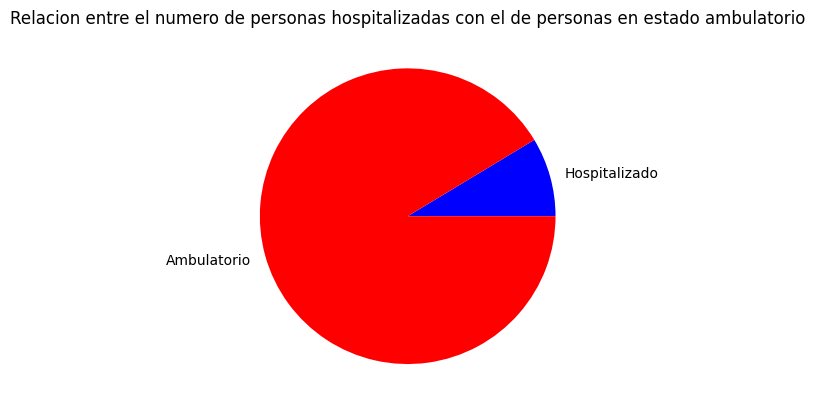

In [59]:
#Grafico circular por tipo de paciente
fig, ax=plt.subplots()
ax.pie([(df["TIPO_PACIENTE"]=="Hospitalizado").sum(), (df["TIPO_PACIENTE"]=="Ambulatorio").sum()], colors=["b", "r"], labels=["Hospitalizado", "Ambulatorio"])
plt.title("Relacion entre el numero de personas hospitalizadas con el de personas en estado ambulatorio")
plt.show()

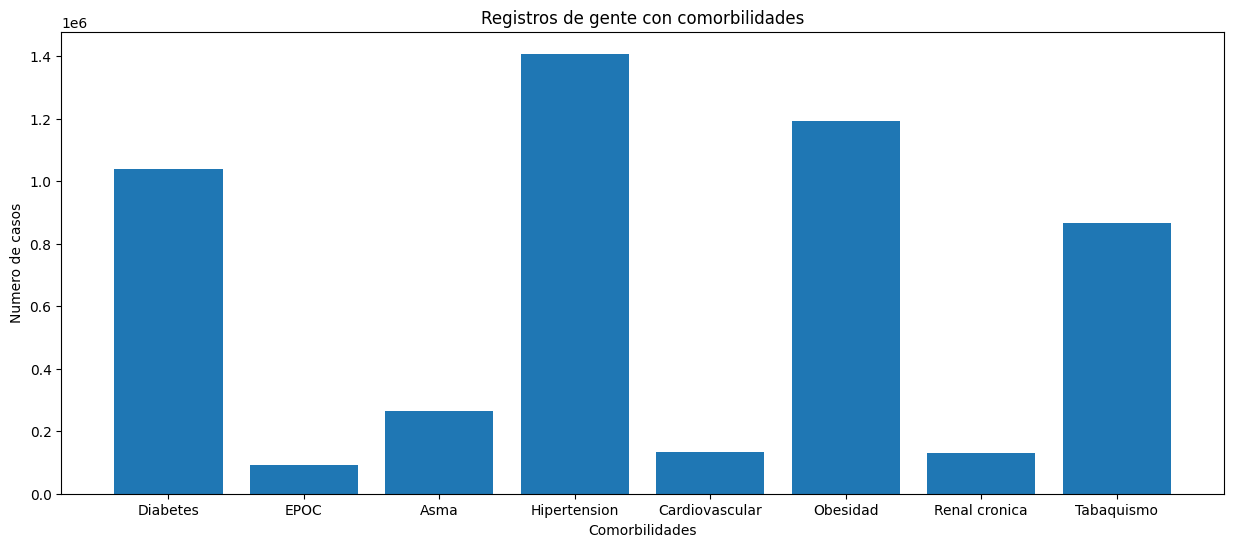

In [65]:
#Grafico de barras por comorbilidad
comorbilidad=["Diabetes", "EPOC", "Asma", "Hipertension", "Cardiovascular", "Obesidad", "Renal cronica", "Tabaquismo"]
num_casos=[(df["DIABETES"]=="Si").sum(),
           (df["EPOC"]=="Si").sum(),
           (df["ASMA"]=="Si").sum(),
           (df["HIPERTENSION"]=="Si").sum(),
           (df["CARDIOVASCULAR"]=="Si").sum(),
           (df["OBESIDAD"]=="Si").sum(),
           (df["RENAL_CRONICA"]=="Si").sum(),
           (df["TABAQUISMO"]=="Si").sum()]
plt.figure(figsize=(15,6))
plt.bar(comorbilidad, num_casos)
plt.xlabel("Comorbilidades")
plt.ylabel("Numero de casos")
plt.title("Registros de gente con comorbilidades")
plt.show()

Pacientes con comorbilidad e interpretacion estadistica.

In [67]:
#Probabilidad simple
print("Proporcion de pacientes con comorbilidad en toda la base")
prob_diabetes=(df["DIABETES"]=="Si").mean()
print("Probabilidad de diabetes:", prob_diabetes)
prob_epoc=(df["EPOC"]=="Si").mean()
print("Probabilidad de EPOC:", prob_epoc)
prob_asma=(df["ASMA"]=="Si").mean()
print("Probabilidad de asma:", prob_asma)
prob_hipertension=(df["HIPERTENSION"]=="Si").mean()
print("Probabilidad de hipertension:", prob_hipertension)
prob_cardiovascular=(df["CARDIOVASCULAR"]=="Si").mean()
print("Probabilidad de enfermedad cardiovascular:", prob_cardiovascular)
prob_obesidad=(df["OBESIDAD"]=="Si").mean()
print("Probabilidad de obesidad:", prob_obesidad)
prob_renalc=(df["RENAL_CRONICA"]=="Si").mean()
print("Probabilidad de enfermedad renal cronica:", prob_renalc)
prob_tabaquismo=(df["TABAQUISMO"]=="Si").mean()
print("Probabilidad de tabaquismo:", prob_tabaquismo)


Proporcion de pacientes con comorbilidad en toda la base
Probabilidad de diabetes: 0.08219432122064929
Probabilidad de EPOC: 0.00731712683848293
Probabilidad de asma: 0.020884197282390948
Probabilidad de hipertension: 0.11142610284439197
Probabilidad de enfermedad cardiovascular: 0.0106385892127349
Probabilidad de obesidad: 0.09442794688762893
Probabilidad de enfermedad renal cronica: 0.010279563540024792
Probabilidad de tabaquismo: 0.06847781504700656


**Esto de abajo esta bien pero tomo mucho tiempo en cargarme. Si funciona**

In [73]:
#Probabilidad condicional
entidades = df["ENTIDAD_NAC"].unique().tolist()
for i in range(len(entidades)):
 total_estado = (df["ENTIDAD_NAC"] == entidades[i]).sum()
 print("Estado:", entidades[i])
 print("  Probabilidad Diabetes:",((df["DIABETES"]=="Si") & (df["ENTIDAD_NAC"]==entidades[i])).sum() / total_estado)
 print("  Probabilidad EPOC:",((df["EPOC"]=="Si") & (df["ENTIDAD_NAC"]==entidades[i])).sum() / total_estado)
 print("  Probabilidad ASMA:",((df["ASMA"]=="Si") & (df["ENTIDAD_NAC"]==entidades[i])).sum() / total_estado)
 print("  Probabilidad HIPERTENSION:",((df["HIPERTENSION"]=="Si") & (df["ENTIDAD_NAC"]==entidades[i])).sum() / total_estado)
 print("  Probabilidad CARDIOVASCULAR:",((df["CARDIOVASCULAR"]=="Si") & (df["ENTIDAD_NAC"]==entidades[i])).sum() / total_estado)
 print("  Probabilidad OBESIDAD:",((df["OBESIDAD"]=="Si") & (df["ENTIDAD_NAC"]==entidades[i])).sum() / total_estado)
 print("  Probabilidad RENAL CRONICA:",((df["RENAL_CRONICA"]=="Si") & (df["ENTIDAD_NAC"]==entidades[i])).sum() / total_estado)
 print("  Probabilidad TABAQUISMO:",((df["TABAQUISMO"]=="Si") & (df["ENTIDAD_NAC"]==entidades[i])).sum() / total_estado)


Estado: San Luis Potosí
  Probabilidad Diabetes: 0.09684133449797773
  Probabilidad EPOC: 0.010254059679376858
  Probabilidad ASMA: 0.020862701686716424
  Probabilidad HIPERTENSION: 0.1291256230415092
  Probabilidad CARDIOVASCULAR: 0.012055799150732082
  Probabilidad OBESIDAD: 0.10344867348733161
  Probabilidad RENAL CRONICA: 0.013056124905228504
  Probabilidad TABAQUISMO: 0.053980114561802545
Estado: Jalisco
  Probabilidad Diabetes: 0.10823306154912349
  Probabilidad EPOC: 0.017083800389769255
  Probabilidad ASMA: 0.03635133186665984
  Probabilidad HIPERTENSION: 0.1558379341299262
  Probabilidad CARDIOVASCULAR: 0.018469853348155107
  Probabilidad OBESIDAD: 0.12627500593026014
  Probabilidad RENAL CRONICA: 0.023314061925869423
  Probabilidad TABAQUISMO: 0.08110967957990502
Estado: Chihuahua
  Probabilidad Diabetes: 0.10560442737372486
  Probabilidad EPOC: 0.012000637201975327
  Probabilidad ASMA: 0.03197809913210731
  Probabilidad HIPERTENSION: 0.1644512097987504


KeyboardInterrupt: 

Ejercicio de distribucion normal

In [70]:
from scipy.stats import norm
#Probabilidad de que un estado tenga entre 2000 y 3000 casos positivos
media=2360
desv_std=714
probabilidad=norm.cdf(3000, media, desv_std) - norm.cdf(2000, media, desv_std)
print("Probabilidad:", probabilidad)


Probabilidad: 0.5079095196676364


**Conclusiones personales**

Durante la asignatura de Probabilidad y Estadística aprendí los conceptos fundamentales para analizar datos, como la media, la desviación estándar, la probabilidad de un evento y el uso de distribuciones como la normal. Aunque no profundicé demasiado, entendí cómo estos elementos permiten interpretar mejor los comportamientos de un conjunto de datos y estimar resultados. Además, tuve la oportunidad de aplicar esos conocimientos mediante Python, lo cual facilitó mucho los cálculos y las gráficas. Al principio me costó familiarizarme con las librerías, pero poco a poco fui entendiendo cómo usar pandas, matplotlib y funciones estadísticas para obtener resultados que antes tardaba mucho en hacer manualmente. Esta experiencia me mostró que Python es una herramienta muy útil para el análisis de datos y me motiva a seguir aprendiendo.
